# Description

I am data analyst in the gym chain Model Fitness. In order to fight churn, Model Fitness has digitized a number of its customer profiles. My task is to analyze them and come up with a customer retention strategy.

I should:
- Learn to predict the probability of churn (for the upcoming month) for each customer
- Draw up typical user portraits: select the most outstanding groups and describe their main features
- Analyze the factors that impact churn most
- Draw basic conclusions and develop recommendations on how to improve customer service

I have CSV file containing data on churn for a given month and information on the month preceding it.

Description of some dataset columns:

`Churn` — the fact of churn for the month in question

`Near_Location` — whether the user lives or works in the neighborhood where the gym is located

`Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)

`Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)

`Phone` — whether the user provided their phone number

`Lifetime` — the time (in months) since the customer first came to the gym

`Contract_period` — 1 month, 3 months, 6 months, or 1 year

`Month_to_end_contract` — the months remaining until the contract expires

`Group_visits` — whether the user takes part in group sessions

`Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime

`Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month

`Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

My main tasks:

1. Carry out exploratory data analysis (EDA)

2. Build a model to predict user churn

3. Create user clusters

4. Conclusions and basic recommendations on working with customers

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    

However, I recommend that you make it broader next time. 
    
</div>

<div class="alert alert-block alert-info"> <b>Made it a little bit broader</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Great! :) It's a good habit actually. I have about 200 notebooks on my laptop with different tasks. Without a good intro it would be hard to remember what a particular notebook is about.

</div>

# Exploratory Data Analysis (EDA)

Quick overview of data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
try:
    df = pd.read_csv('/datasets/gym_churn_us.csv')
except:
    df = pd.read_csv('gym_churn_us.csv')

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Prepare the data for analysis

    For preparing data to analysis I will do:
1) Rename the columns (to lowercase)

2) Check for missing values and data types. Correct the data if needed

3) Check for duplicates

In [6]:
print(df.columns)

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')


In [7]:
df.columns = [x.lower() for x in df.columns]

In [8]:
df.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

    Wrong types:

In [9]:
df.month_to_end_contract.unique()

array([ 5., 12.,  1.,  6.,  3., 10., 11.,  9.,  4.,  7.,  8.,  2.])

In [10]:
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')

In [11]:
df.month_to_end_contract.unique()

array([ 5, 12,  1,  6,  3, 10, 11,  9,  4,  7,  8,  2])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

We haven't got missing values here

In [13]:
df.duplicated().sum()

0

We haven't got duplicates

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Important thing to check, good job! 
    


</div>

    Looking at the mean feature values in two groups: for those who left (churn) and for those who stayed

In [14]:
df.groupby(['churn']).mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


All parameters are better for group 0. It is especially interesting that the `partner`, `promo_friends` and `group_visits` parameters for group 0 are almost 2 times better, so these seem to be effective promos.

And of course `contract_period`, `month_to_end_contract` and `lifetime` parameters for group 0 also much better.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
We can already make some assumptions. For exammple, a churn rate may be smaller for those who leave near the gym and those who have a least 6 month contract. 




</div>

    Plot bar histograms and feature distributions for those who left (churn) and those who stayed

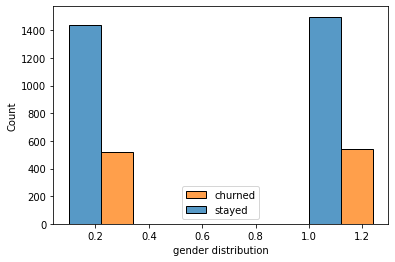

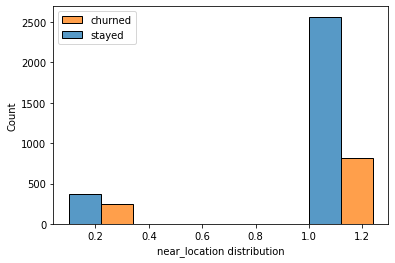

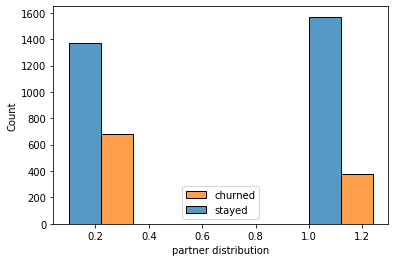

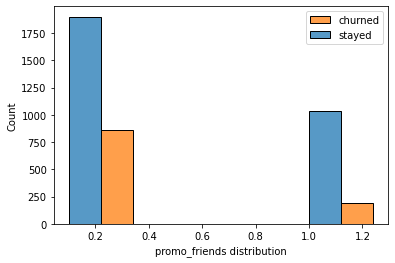

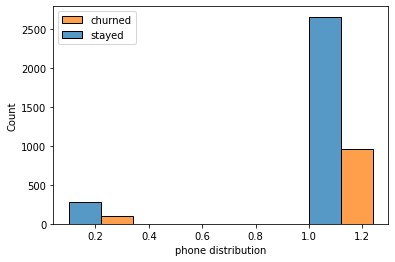

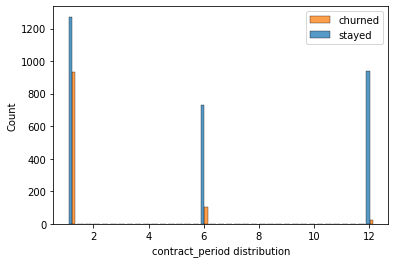

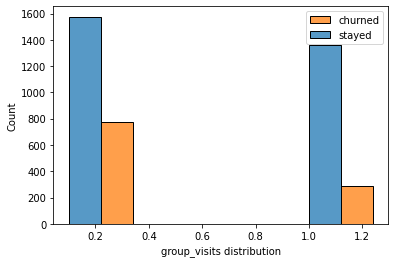

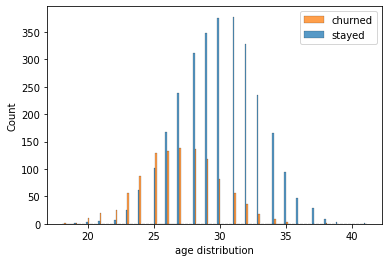

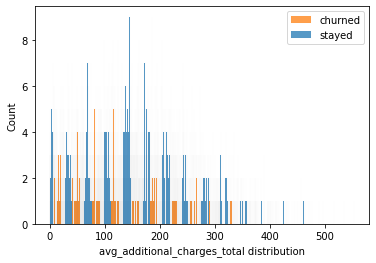

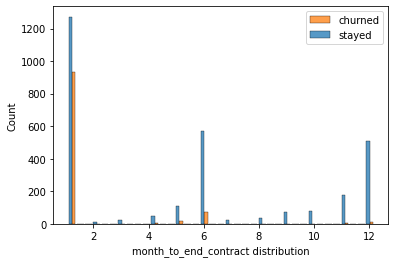

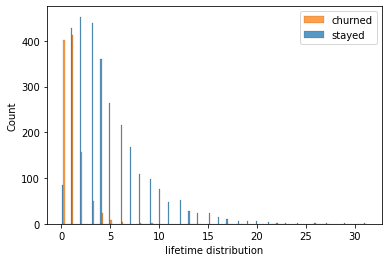

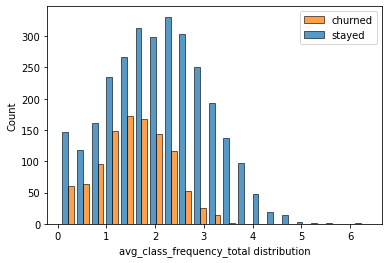

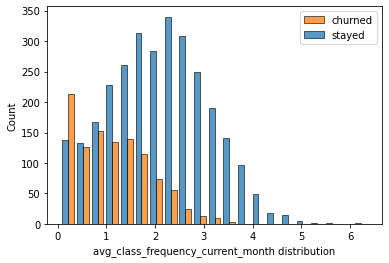

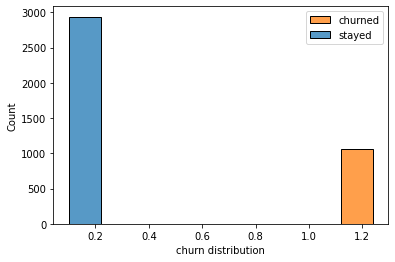

In [15]:
for feature in df.columns:
    sns.histplot(data=df, x=feature, hue="churn", binwidth=0.3, multiple="dodge", shrink=.8).set_xlabel(f'{feature} distribution')
    plt.legend(title='', labels=['churned', 'stayed'])
    plt.show()

Here we see in histograms that all parameters are better for stayed group (0).

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Let's make the charts more accurate. Each chart has to have titles and lucid axes labels. `count` may not be clear to a reader. Additionally, `distribution` is not a correct word for axis label, because these are values, not distribution. Distribution is the what the chart represents.   

</div>

<div class="alert alert-block alert-info"> <b>Got it! Fixed it below:</b> <a class="tocSkip"></a>
</div>

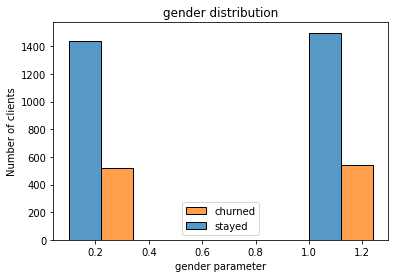

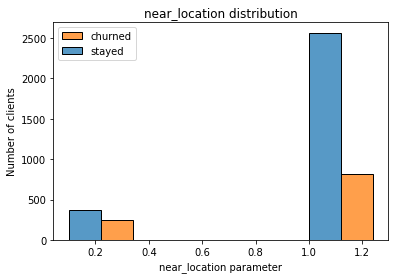

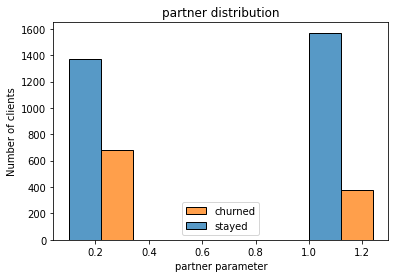

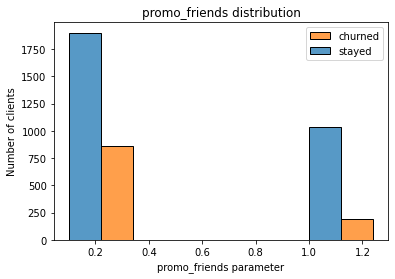

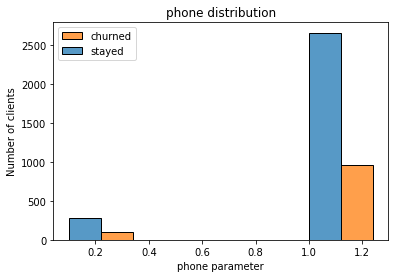

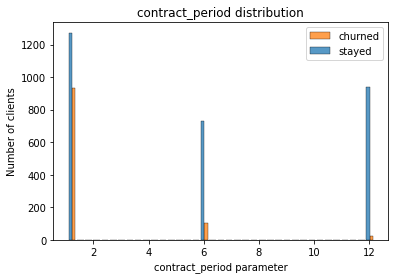

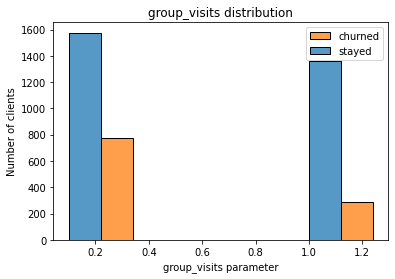

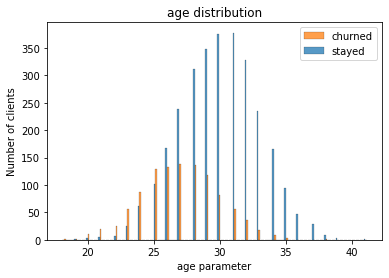

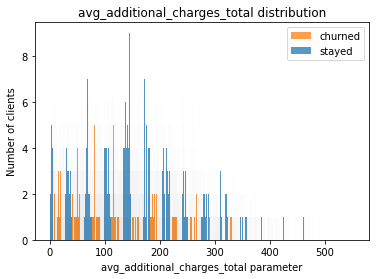

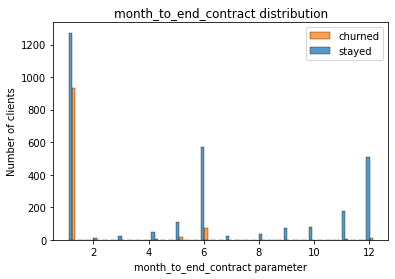

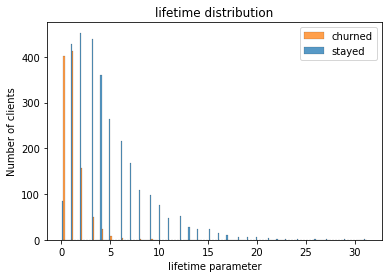

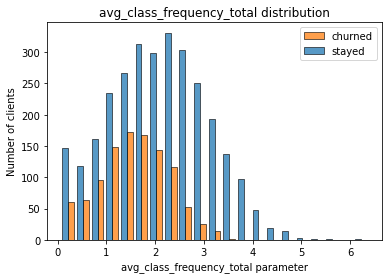

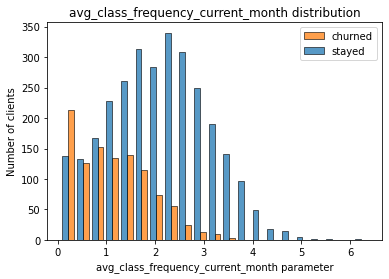

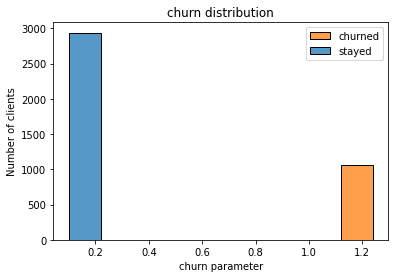

In [16]:
for feature in df.columns:
    ax = sns.histplot(data=df, x=feature, hue="churn", binwidth=0.3, multiple="dodge", shrink=.8)
    plt.legend(title='', labels=['churned', 'stayed'])
    ax.set(xlabel=f'{feature} parameter', ylabel='Number of clients')
    plt.title(f'{feature} distribution')
    plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Looks much better! 
</div>

    Build a correlation matrix

In [17]:
corr_mat = df.corr()

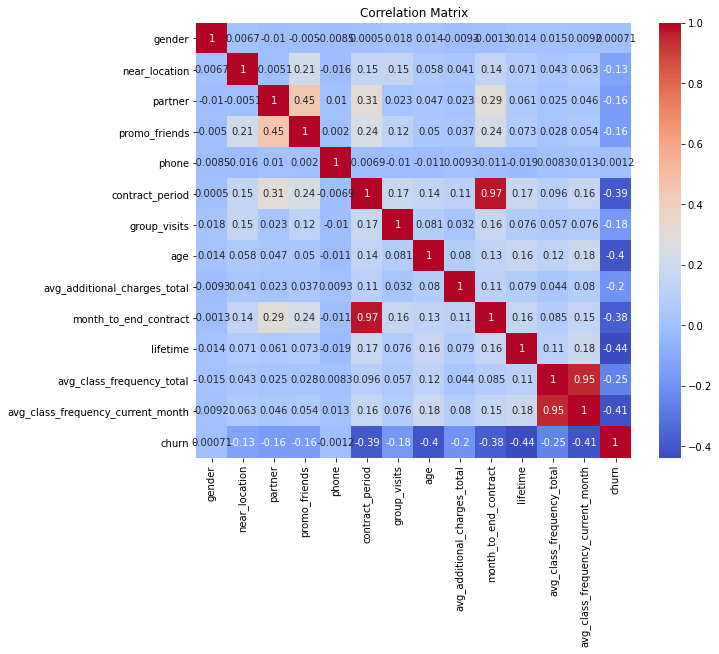

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Large positive correlation:

`month_to_end_contract` and `contract_period` (0.97)

`avg_class_frequency_total` and `avg_class_frequency_current_month` (0.95)

`promo_friends` and `partner` (0.45)

Large negative correlation:

`churn` and `lifetime` (-0.44)

`churn` and `avg_class_frequency_current_month` (-0.41)

`churn` and `age` (-0.4)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Yes, we should notice the presence of highly correlated features. 
    
</div>

# Build a model to predict user churn

Build a binary classification model for customers where the target feature is the user's leaving next month.

Divide the data into features (the X matrix) and a target variable (y)

In [19]:
X = df.drop(columns = ['churn'])
y = df['churn'] 

Divide the data into train and test sets using the 80/20 principle

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Correct. 
    
</div>

Standardize the data using the StandardScaler method

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_st = scaler.transform(X_train)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's a `fit_transform` method that you can also use.     
</div>

In [24]:
X_test_st = scaler.transform(X_test)

Define the model's algorithm - LogisticRegression

In [25]:
lr_model = LogisticRegression(random_state=0)

In [26]:
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

Use the trained model to make forecasts

In [27]:
lr_predictions = lr_model.predict(X_test_st)

In [28]:
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

Define the function that will output our metrics (Accuracy, Precision, Recall)

In [29]:
def print_all_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>  Reviewer's comment </b>
    
`y_proba` is not even used. Do we need this argument?     
</div>

<div class="alert alert-block alert-info"> <b>Yes, my fault! I admit - this is not my formula. I didn't notice this argument...
    
Fixed it, thanks</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Got it :) 
</div>

Create a DataFrame with features and their weights

In [30]:
features = pd.DataFrame({'feature': X_train.columns, 'coeff': lr_model.coef_[0]})
features['coeff_abs'] = [abs(i) for i in features['coeff']]

In [31]:
display(features.sort_values('coeff_abs', ascending = False))

,feature,coeff,coeff_abs
12,avg_class_frequency_current_month,-4.454231,4.454231
10,lifetime,-3.846281,3.846281
11,avg_class_frequency_total,3.299788,3.299788
7,age,-1.091431,1.091431
5,contract_period,-0.719095,0.719095
8,avg_additional_charges_total,-0.552164,0.552164
9,month_to_end_contract,-0.534026,0.534026
6,group_visits,-0.393453,0.393453
3,promo_friends,-0.275671,0.275671
2,partner,-0.081512,0.081512


Print all metrics for logistic regression

In [32]:
print_all_metrics(y_test, lr_predictions, title='Metrics for logistic regression:')

Metrics for logistic regression:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


Define the model's algorithm - RandomForestClassifier

In [33]:
forest_model = RandomForestClassifier(random_state=0)

In [34]:
forest_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

Use the trained model to make forecasts

In [35]:
forest_predictions = forest_model.predict(X_test_st)
forest_probabilities = forest_model.predict_proba(X_test_st)[:,1]

Print all metrics for RandomForestClassifier

In [36]:
print_all_metrics(y_test, forest_predictions, title='Metrics for random forest:')

Metrics for random forest:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


Conclusion: logistic regression model gave better results for Precision and Recall. Accuracy is the same for both models.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

I can recommend you playing around with hyperparameters. It may improve the quality. 

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Anyway, good job here 👍
</div>

<div class="alert alert-block alert-info"> <b>What do you mean by "playing around with hyperparameters"?
    
Is it about delete some parameters that have big correlation?
Or something else?</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Hyperparameters are the parameters of the model. We can change these parameters to receive a different result. For forests, for instance, you can redefine parameters like the number of trees (n_estimators), minimum number of samples at leaf node (min_samples_leaf) and so on. 
    
    
</div>

# Create user clusters

Set aside the column with data on churn

In [37]:
X

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237


Standardize the data

In [38]:
sc = StandardScaler()

In [39]:
x_sc = sc.fit_transform(X)

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
The same dataframe has already been created, so there's no need to repeat the code. 

</div>

<div class="alert alert-block alert-info"> <b>Ok, thank you! I will delete it in final version</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
👍    
    
</div>

Make the table with the linked bundles of objects with linkage()

In [40]:
linked = linkage(x_sc, method = 'ward') 

Plot a dendrogram

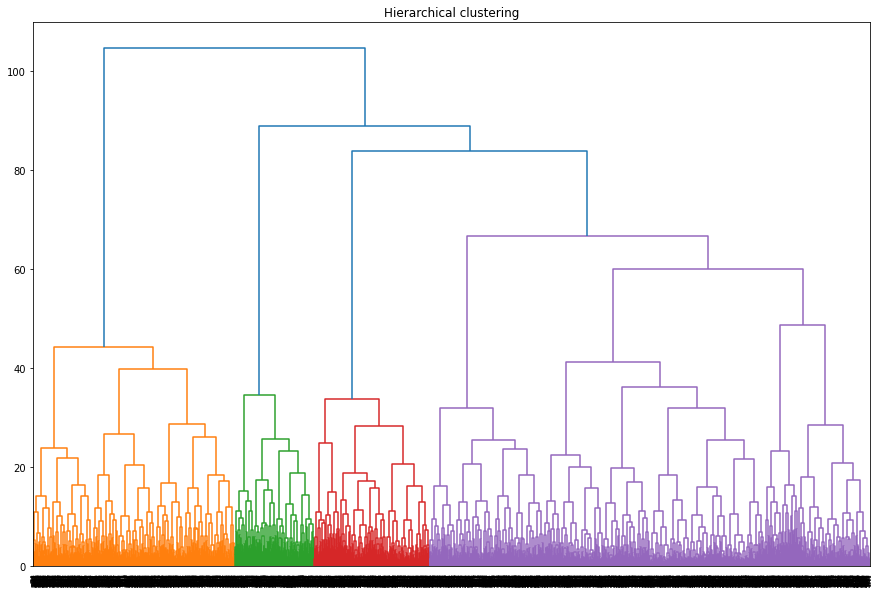

In [41]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show() 

If we draw a line at y=50, we get 6 clusters. But in task it is said, that we need n=5 for KMeans, so next step - clustering model with the K-means algorithm.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good. 

</div>

Вefine the k_means model with 5 clusters

In [42]:
km = KMeans(n_clusters = 5)

Predict the clusters for observations 

In [43]:
labels = km.fit_predict(x_sc)

Store cluster labels in the field of our dataset

In [44]:
X['cluster_km'] = labels
X

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,3
1,0,1,0,0,1,12,1,31,113.202938,12,7,1.922936,1.910244,1
2,0,1,1,0,1,1,0,28,129.448479,1,2,1.859098,1.736502,4
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,1
4,1,1,1,1,1,1,0,26,198.362265,1,3,1.113884,1.120078,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12,8,2.284497,2.349070,1
3996,0,1,0,0,1,1,1,29,68.883764,1,1,1.277168,0.292859,4
3997,1,1,1,1,1,12,0,28,78.250542,11,2,2.786146,2.831439,1
3998,0,1,1,1,1,6,0,32,61.912657,5,3,1.630108,1.596237,1


Get the statistics of the mean feature values per cluster

In [45]:
X.groupby(['cluster_km']).mean().T

cluster_km,0,1,2,3,4
gender,0.497041,0.498531,0.565371,0.523316,0.483428
near_location,0.000000,0.960823,0.977621,0.862694,1.000000
partner,0.461538,0.783546,0.342756,0.471503,0.355699
promo_friends,0.078895,0.575906,0.221437,0.305699,0.242522
phone,1.000000,1.000000,1.000000,0.000000,1.000000
contract_period,2.378698,10.854065,2.554770,4.777202,1.959580
group_visits,0.218935,0.539667,0.472320,0.427461,0.340340
age,28.479290,29.972576,30.122497,29.297927,28.143088
avg_additional_charges_total,135.631940,161.128963,161.405331,144.208179,130.799808
month_to_end_contract,2.224852,9.920666,2.353357,4.466321,1.869038


All `phone`==0 in cluster 0, all `near_location`==0 in cluster 2. 3rd cluster has the biggest `partner` parameter, 2nd cluster has the smallest `promo_friends` parameter. Also 3rd cluster has the biggest `month_to_end_contract`. 4th cluster has the biggest parameters `avg_class_frequency_total` and `avg_class_frequency_current_month`.

In [46]:
X.groupby(['cluster_km'])['gender'].count()

cluster_km
0     507
1    1021
2     849
3     386
4    1237
Name: gender, dtype: int64

Plot distributions of features for the clusters

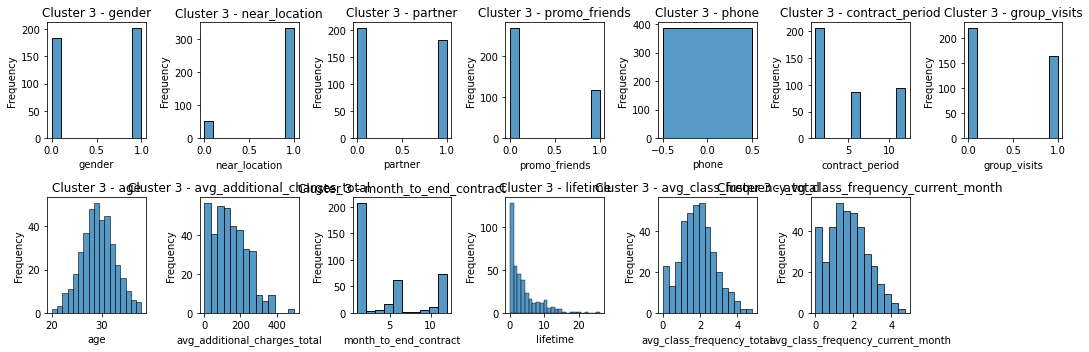

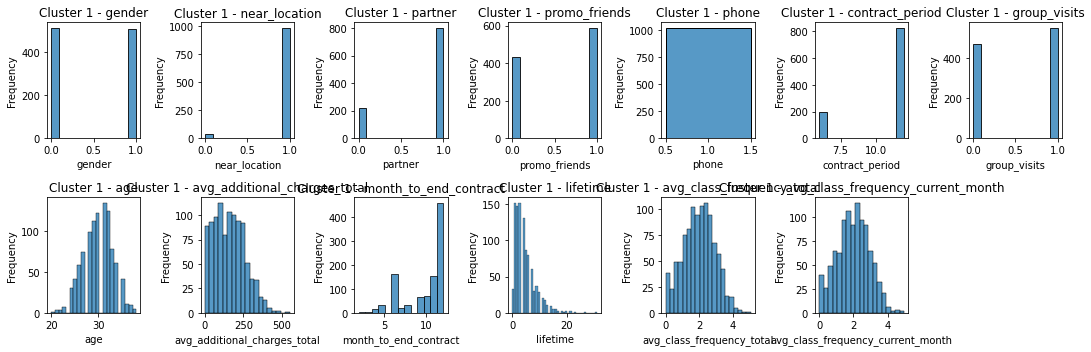

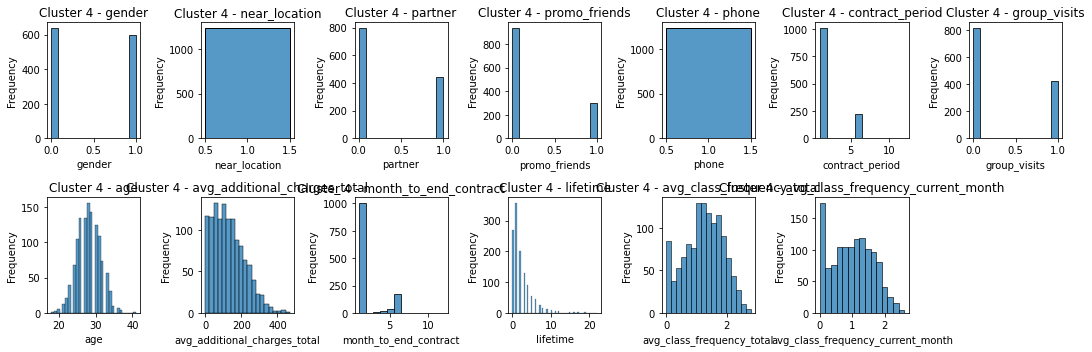

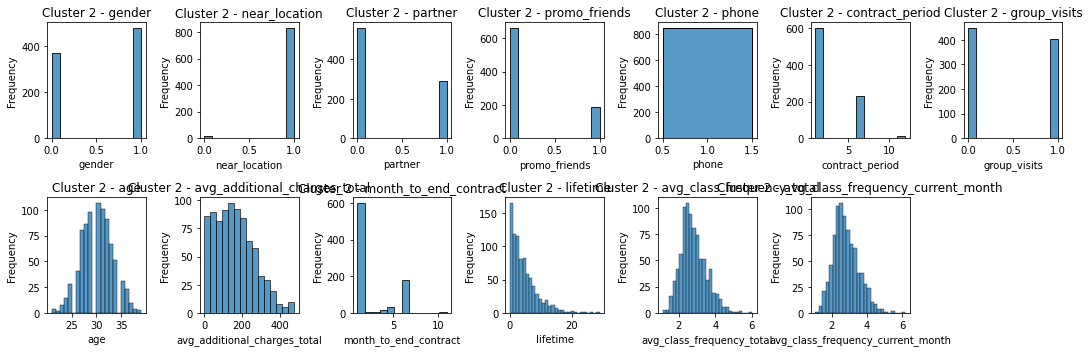

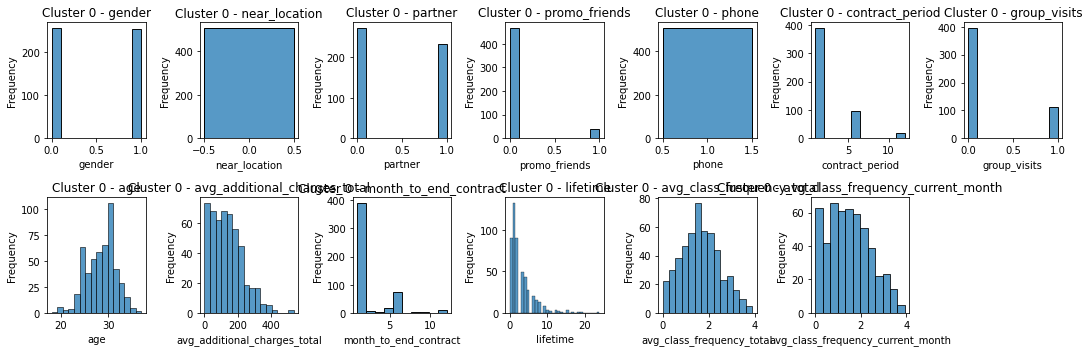

In [47]:
for cluster in X['cluster_km'].unique():
    # Filter data for the current cluster
    cluster_data = X[X['cluster_km'] == cluster]
    
    # Create a grid of subplots with 5 columns
    fig, axes = plt.subplots(nrows=len(X.columns[:-1]) // 7 + 1, ncols=7, figsize=(15, 5))
    
    # Flatten the axes array to iterate over it
    axes = axes.flatten()
    
    # Iterate over each feature (excluding the cluster label)
    for i, feature in enumerate(X.columns[:-1]):
        # Plot the distribution of the feature for the current cluster
        sns.histplot(cluster_data[feature], ax=axes[i])
        
        # Set plot title and axis labels
        axes[i].set_title(f'Cluster {cluster} - {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        
    # Hide any unused subplots
    for j in range(len(X.columns[:-1]), len(axes)):
        axes[j].axis('off')
        
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Here you can consider each of the features separately to make the graphs easier to interpret. Some of the charts may look confusing, so it may be a good idea to make them more accurate. 
</div>

<div class="alert alert-block alert-info"> <b>Ok, made it below</b> <a class="tocSkip"></a>
</div>

Distibution by gender parameter:


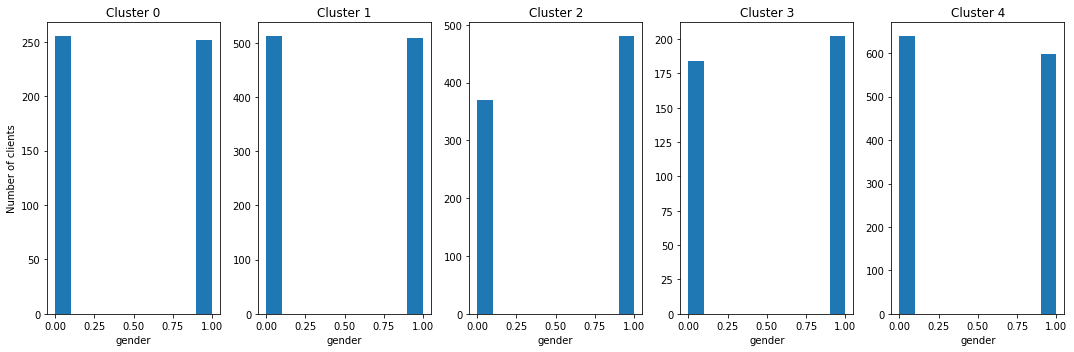

Distibution by near_location parameter:


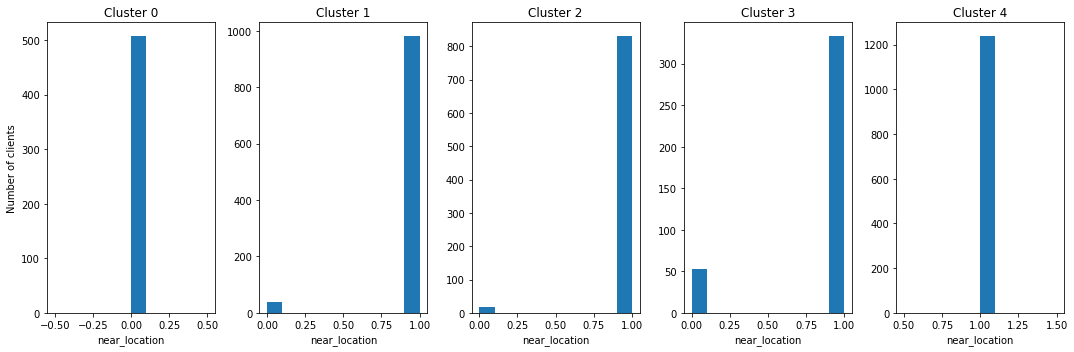

Distibution by partner parameter:


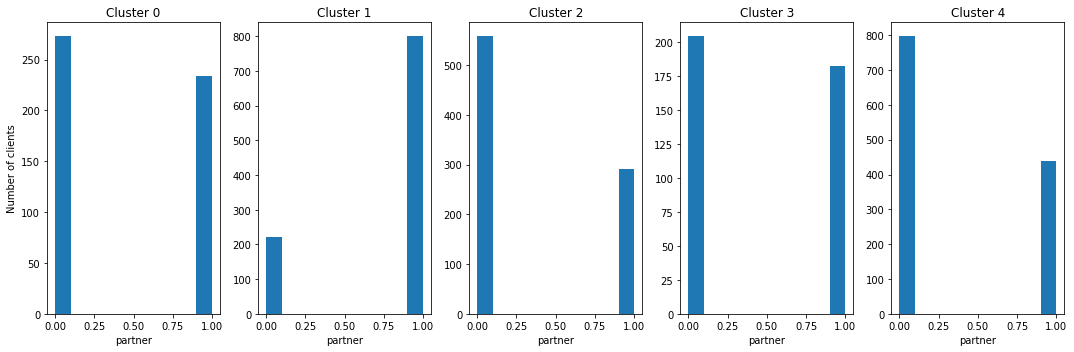

Distibution by promo_friends parameter:


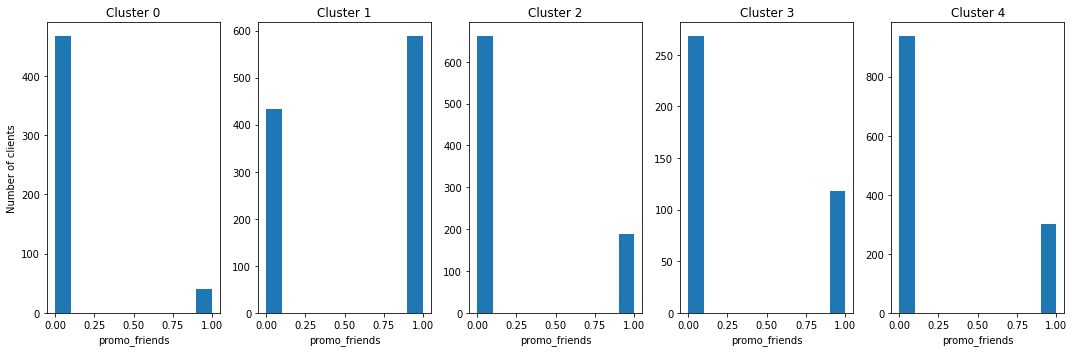

Distibution by phone parameter:


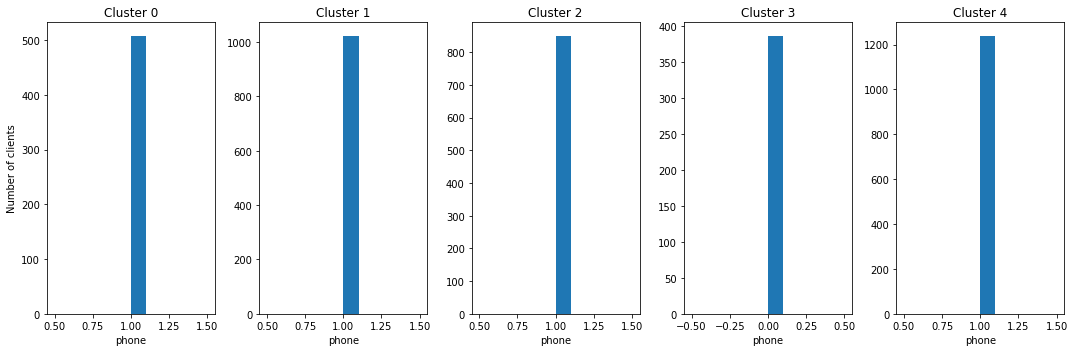

Distibution by contract_period parameter:


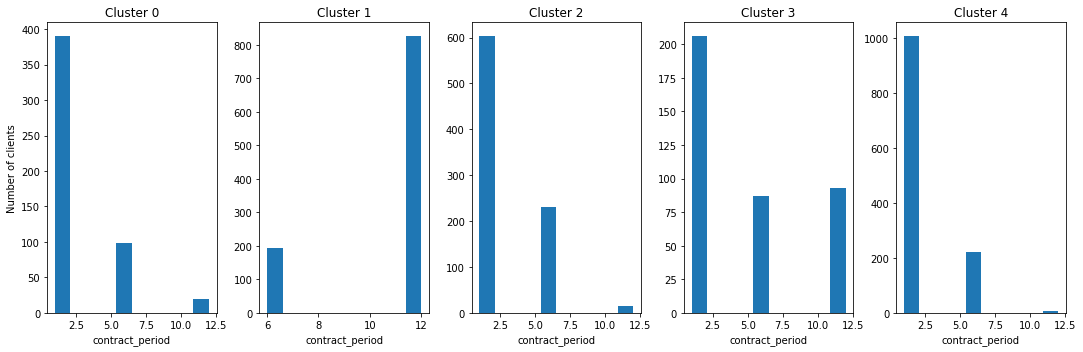

Distibution by group_visits parameter:


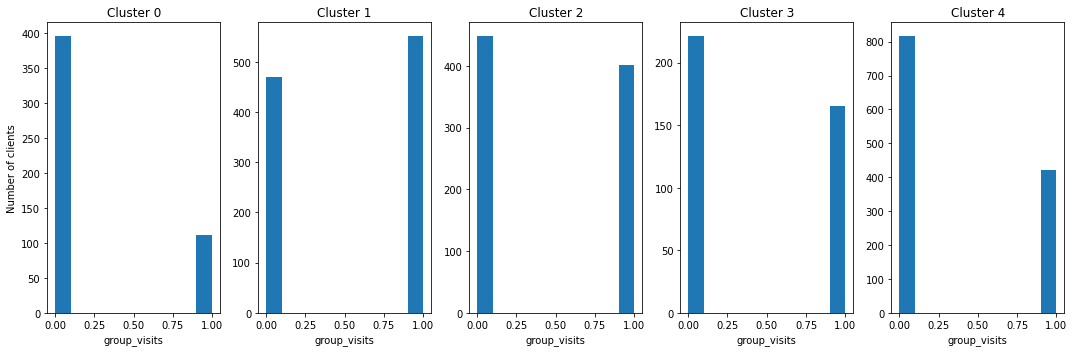

Distibution by age parameter:


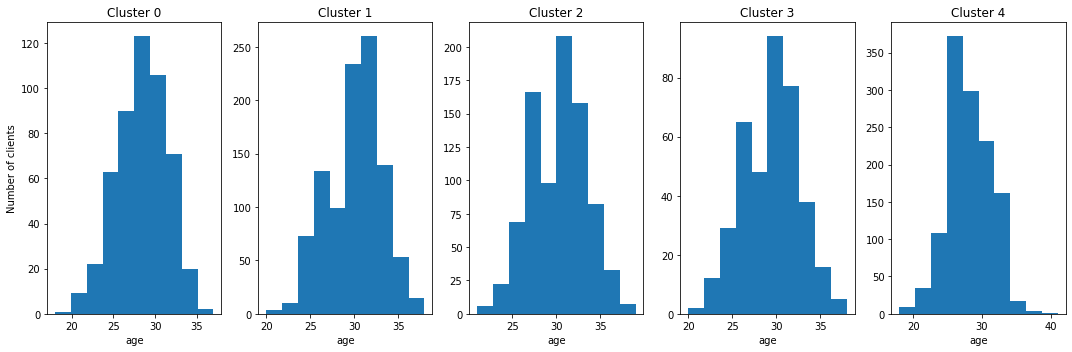

Distibution by avg_additional_charges_total parameter:


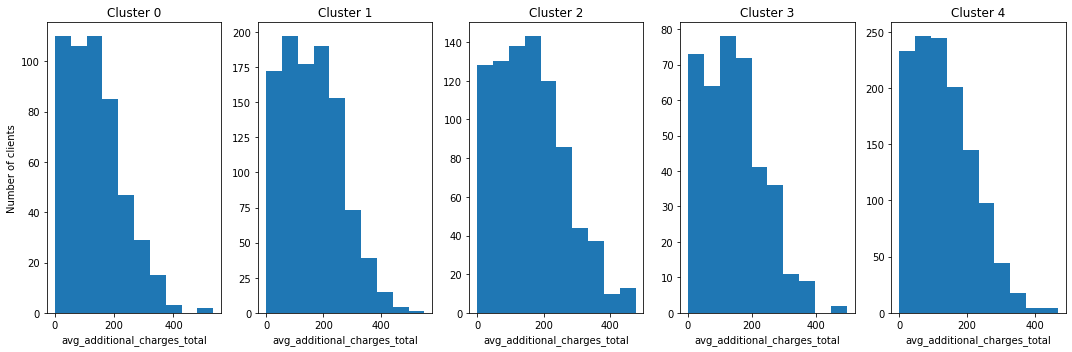

Distibution by month_to_end_contract parameter:


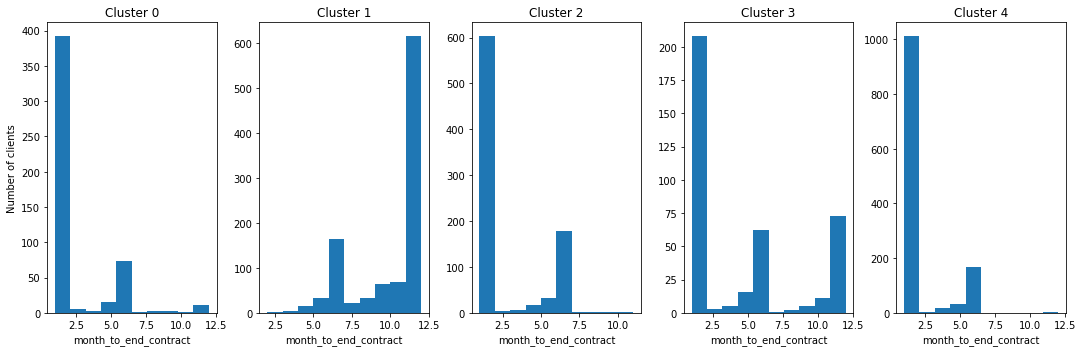

Distibution by lifetime parameter:


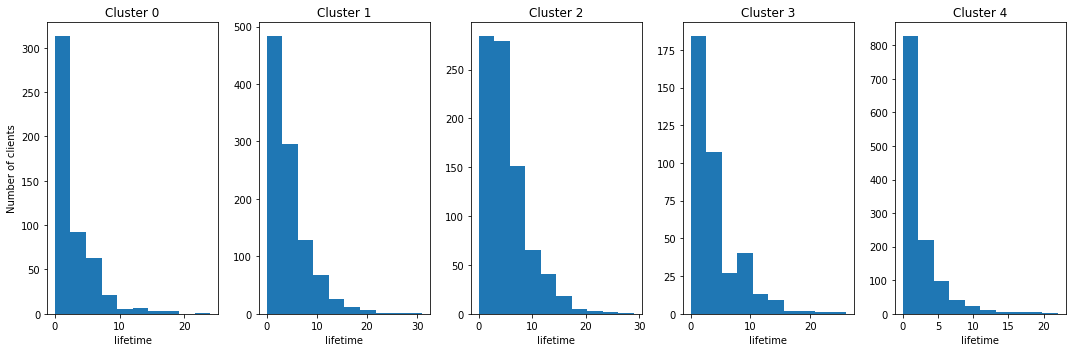

Distibution by avg_class_frequency_total parameter:


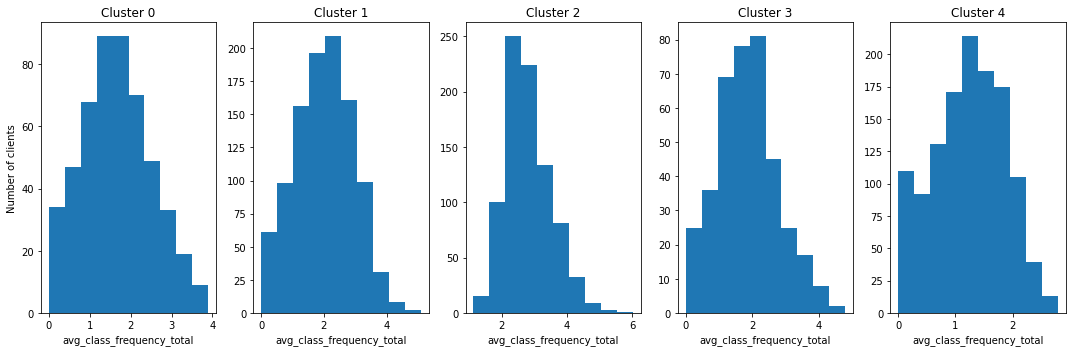

Distibution by avg_class_frequency_current_month parameter:


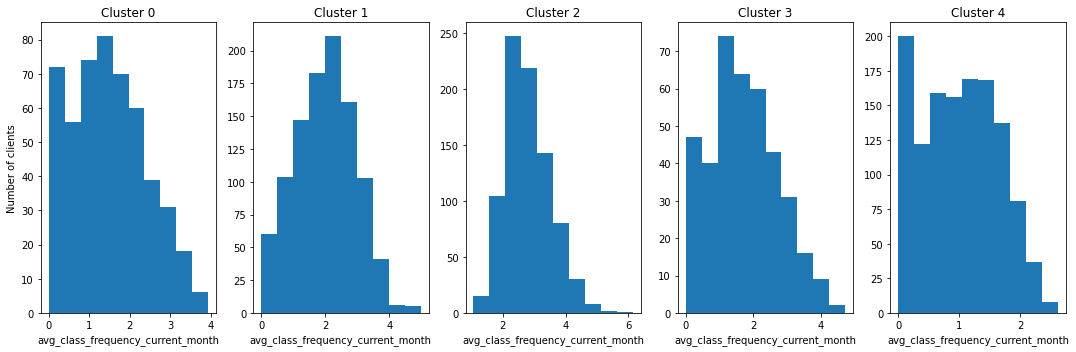

Distibution by cluster_km parameter:


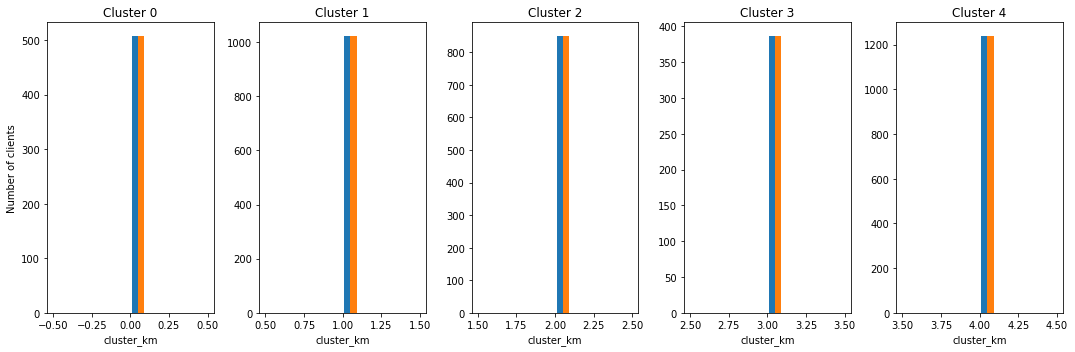

In [48]:
for column in X:
    print(f'Distibution by {column} parameter:')
    for_hist = X[[column, 'cluster_km']]
    fig, axes = plt.subplots(ncols=5, figsize=(15, 5))
    axes = axes.flatten()
    axes[0].hist(for_hist[for_hist['cluster_km']==0][column])
    axes[0].set_title(f'Cluster 0')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Number of clients')
    axes[1].hist(for_hist[for_hist['cluster_km']==1][column])
    axes[1].set_title(f'Cluster 1')
    axes[1].set_xlabel(column)
    axes[2].hist(for_hist[for_hist['cluster_km']==2][column])
    axes[2].set_title(f'Cluster 2')
    axes[2].set_xlabel(column)
    axes[3].hist(for_hist[for_hist['cluster_km']==3][column])
    axes[3].set_title(f'Cluster 3')
    axes[3].set_xlabel(column)
    axes[4].hist(for_hist[for_hist['cluster_km']==4][column])
    axes[4].set_title(f'Cluster 4')
    axes[4].set_xlabel(column)
    plt.tight_layout()
    plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Although it requires more space, it still looks better and more lucid.     
    
</div>

Cluster 0 is where the users did not indicate a phone number. In cluster 2, all clients do not live nearby, and there are also few promo friends there. In cluster 3 many partners, thay have a long contract period and a month left. Cluster 3 also has a high number of visits in current month. In cluster 1 short contract period and months left. In 4th cluster visits current month and previous month more than 2.

The churn rate for each cluster 

In [49]:
df['cluster_km'] = X['cluster_km']

In [50]:
df.groupby(['cluster_km'])['churn'].mean().sort_values(ascending=False)

cluster_km
4    0.519806
0    0.441815
3    0.266839
2    0.074205
1    0.027424
Name: churn, dtype: float64

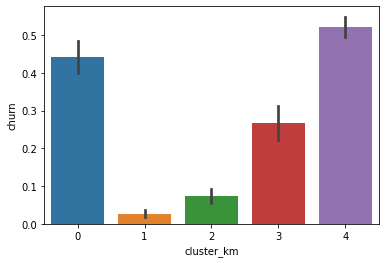

In [51]:
sns.barplot(data=df, x="cluster_km", y="churn")
plt.show()

Clusters 1 and 2 are prone to leaving, and clusters 3 and 4 are loyal

# Conclusions and basic recommendations

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
- As a result, what have been done and what conclusions have been made? 
    
    
- What can be said about clusters? 
    
    
    
- What indicates more and less reliable customers? 


- What can be recommended? </div>

<div class="alert alert-block alert-info"> <b>OMG, I wrote a conclusion before submitting the project for review. But for some reason it wasn't saved.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Unfortunately, it happens. Just save everything manually by clicking "save" button in the upper-left corner.     
    
</div>

Using clustering with the K-means method, we divided all users into 5 groups.

The analysis showed that clusters 3 and 4 are less prone to churn, while clusters 1 and 2 are very prone to churn (about 50% of clients from these groups left).

In order to predict churn, we need to focus on clusters 1 and 2 and understand what makes them different from the others.

Cluster 2 is characterized by people who live far away. Also, they didn't sign up through a "bring a friend" offer. Most of them are under 30 years old, they have 1-2 months left until the end of the contract. On average, they attend less than 2 times a week.

Cluster 1 is characterized by people who, in the majority, also didn't sign up through a "bring a friend" offer. Their contract period is 1. They are also mostly under 30 years old. They have 1-2 months left until the end of the contract and visits per week on average less than 2.

Key Measures for churn prevention:

1) Promotions for young people for a long subscription period

2) Analysis of the addresses of clients of the second cluster on the possibility of opening a new gym

3) Attention to people who did not come through a friend's promo - additional promotions, discounts

4) Stimulating more than 2 visits per week - free training programs, seminars.

5) Attention to people who visit less than 2 times a week

6) Work to keep people who bought a short contract (1-3 months)


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2 </h2>
    
Makes sense.     
</div>